In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open('input.txt', 'r') as f:
    sketch = f.read().splitlines()

In [2]:
# Get the number of rows and columns in the sketch
nrows = len(sketch)
ncols = len(sketch[0])

# Part 1

In [3]:
# Find the S in the sketch
for row in range(nrows):
    for col in range(ncols):
        if sketch[row][col] == 'S':
            S_index = (row, col)

In [4]:
# Assuming there's a single point which is the furthest away from S, we can 
# track the paths along each direction and see where they meet

def get_connecting(row, col):

    # Get all connecting characters to the index (row, column)

    # The character at (row, col)
    current_character = sketch[row][col]

    if current_character == 'S':

        connecting = {}

        # Above
        if row-1 not in [-1, nrows]:
            if sketch[row-1][col] in ['|', '7', 'F']:
                connecting[(row-1, col)] = sketch[row-1][col]
        
        # Below
        if row+1 not in [-1, nrows]:
            if sketch[row+1][col] in ['|', 'L', 'J']:
                connecting[(row+1, col)] = sketch[row+1][col]

        # Left
        if col-1 not in [-1, ncols]:
            if sketch[row][col-1] in ['-', 'L', 'F']:
                connecting[(row, col-1)] = sketch[row][col-1]

        # Right
        if col+1 not in [-1, ncols]:
            if sketch[row][col+1] in ['-', 'J', '7']:
                connecting[(row, col+1)] = sketch[row][col+1]

    else:

        # Dictionary of how each character connects to adjacent characters
        connections_dict = {
            '|': [(row-1, col), (row+1, col)],
            '-': [(row, col-1), (row, col+1)],
            'L': [(row-1, col), (row, col+1)],
            'J': [(row-1, col), (row, col-1)],
            '7': [(row+1, col), (row, col-1)],
            'F': [(row+1, col), (row, col+1)],
        }

        connecting_indices = connections_dict[current_character]

        # Dictionary of characters that are connecting to the current character
        connecting = {
            (rowi, coli): sketch[rowi][coli] for rowi, coli in connecting_indices
            }
        
    return connecting

In [5]:
# Get the two pipes that connect to S. These are the starting points of each
# path we'll follow
S_connections = get_connecting(*S_index)

path1 = [S_index, list(S_connections.keys())[0]]
path2 = [S_index, list(S_connections.keys())[1]]

In [6]:
# Follow the paths until they meet
while path1[-1] != path2[-1]:

    # Get the connecting points to the last point in each path
    path1_connections = get_connecting(*path1[-1])
    path2_connections = get_connecting(*path2[-1])

    # Determine the next point in the path
    for c in path1_connections.keys():
        if c not in path1:
            path1_next = c
            
    for c in path2_connections.keys():
        if c not in path2:
            path2_next = c

    # Append the next point to each path
    path1.append(path1_next)
    path2.append(path2_next)

In [7]:
print(len(path1) - 1)

6786


# Part 2

In [8]:
# The complete path
path = path1 + path2[1:-1][::-1]

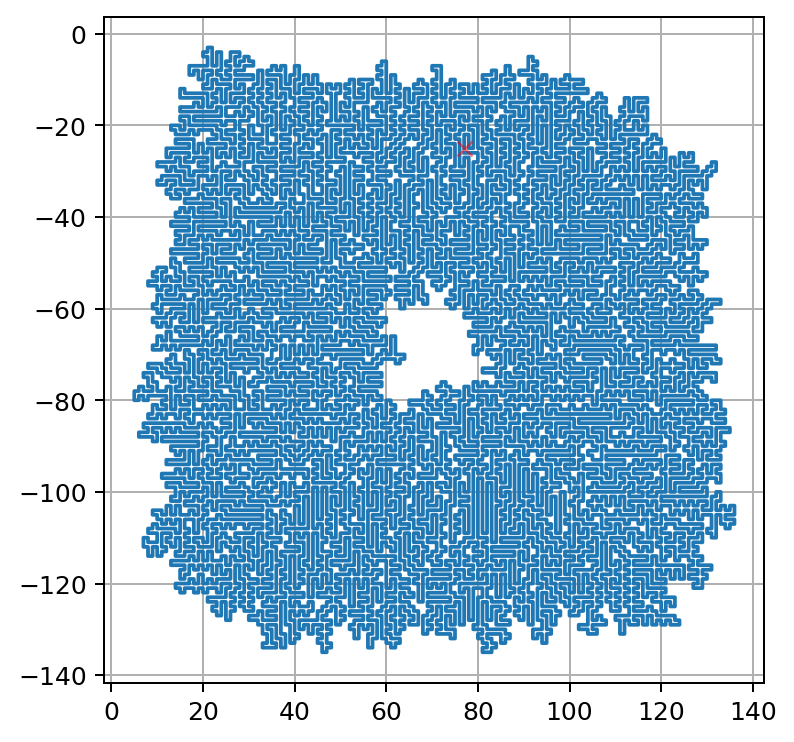

In [9]:
# Plot the path, indicating the starting point
fig, ax = plt.subplots(dpi=180)
ax.set_aspect('equal')

ax.plot([c[1] for c in path], -np.array([c[0] for c in path]))
ax.plot(path[0][1], -path[0][0], 'x', color='red', alpha=0.5)

_ = ax.grid()

In [10]:
# Moving along the path, points that are inside the loop will always be on the
# same side of the path. Assuming we get the correct side, we can use this to
# determine which points are inside the loop.

inside_coords = []

previous = path[0]
for i in range(1, len(path)):

    current = path[i]

    # The change in row and column between the previous and current points 
    # tells us which direction we're moving in, and so it tells us which side
    # of the path is which
    drow = current[0] - previous[0]
    dcol = current[1] - previous[1]

    # Moving upwards
    if drow == -1:
        # Get the points which are inside the loop. They are proposed points
        # because we need to check if they're part of the path, or if they're
        # already in the list of inside points
        proposed = [
            # We get the point directly to the right of the current point, and
            # the point diagonally downwards to the right (i.e., SE).
            (current[0], current[1]+1),
            (current[0]+1, current[1]+1)
            ]

    # Moving downwards
    if drow == 1:
        proposed = [
            (current[0]-1, current[1]-1), 
            (current[0], current[1]-1), 
            ]

    # Moving rightwards
    elif dcol == 1:
        proposed = [
            (current[0]+1, current[1]-1),
            (current[0]+1, current[1]),
            ]

    # Moving leftwards
    elif dcol == -1:
        proposed = [
            (current[0]-1, current[1]),
            (current[0]-1, current[1]+1)
            ]
    
    for p in proposed:
        if (p not in path) and (p not in inside_coords):
            inside_coords.append(p)

    previous = current

In [11]:
# The above loop only gets the points inside the loop that are adjacent to the
# path. So we find all points connecting to the known inside points, filling
# in the rest of the inside points

while True:
    new_point = False
    for row, col in inside_coords:
        for proposed in [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]:
            if (proposed not in path) and (proposed not in inside_coords):
                inside_coords.append(proposed)
                new_point = True
    if not new_point:
        break

In [12]:
print(len(inside_coords))

495


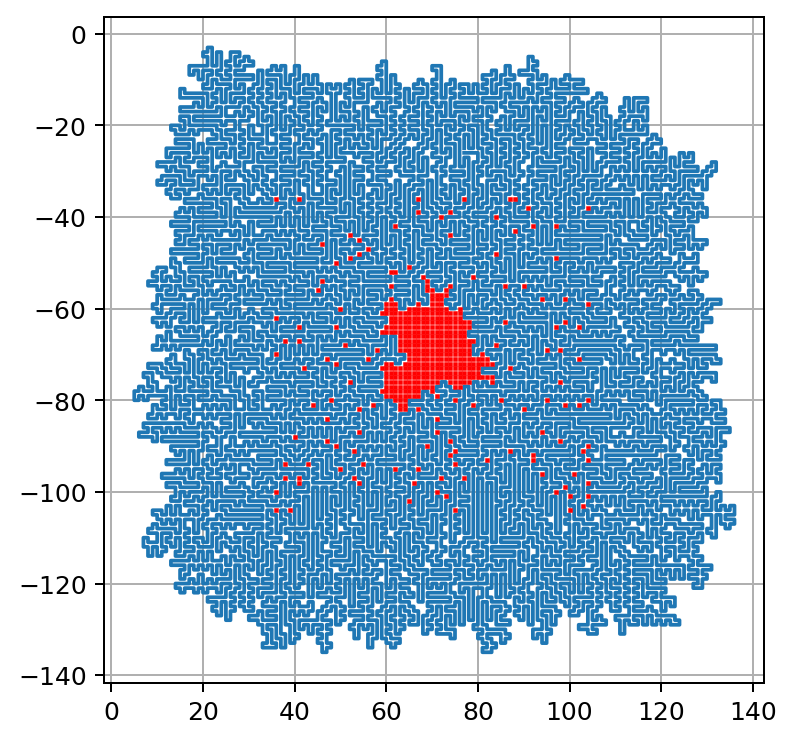

In [13]:
fig, ax = plt.subplots(dpi=180)
ax.set_aspect('equal')

ax.plot([c[1] for c in path], -np.array([c[0] for c in path]))
ax.plot(
    [c[1] for c in inside_coords], 
    -np.array([c[0] for c in inside_coords]), 
    's', 
    color='red',
    markersize=1
    )

_ = ax.grid()